In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df_final = pd.read_csv("C:/Users/DO PHUONG DUNG/Music/Fintech/Năm 4/Python/Big data/df_final.csv")


In [6]:

print(df_final.columns)
df_final.head()

Index(['orderid', 'cashier', 'saledate', 'total', 'customerid', 'ticketcode',
       'date', 'time', 'slot', 'room', 'show_id', 'slot type', 'ticket type',
       'ticket price', 'popcorn', 'DOB', 'Gender', 'Quận/Huyện', 'Tỉnh', 'job',
       'industry', 'title', 'director', 'country', 'rating', 'listed_in',
       'Age', 'Time of day', 'Age Group'],
      dtype='object')


,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,...,job,industry,title,director,country,rating,listed_in,Age,Time of day,Age Group
0,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074925,2019-05-06,1900-01-01 18:15:00,G04,3,...,student,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-25)
1,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074924,2019-05-06,1900-01-01 18:15:00,G03,3,...,student,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-25)
2,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097042,2019-05-22,1900-01-01 20:45:00,E04,2,...,student,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-25)
3,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097041,2019-05-22,1900-01-01 20:45:00,E03,2,...,student,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-25)
4,10130052019B0141,emp005,2019-05-30,90000,0000000034,20106761,2019-05-30,1900-01-01 19:30:00,F04,1,...,student,health service,NGÔI ĐỀN KỲ QUÁI (Pee Nak),Phontharis Chotkijsadarsopon,Thailand,PG-13,"Comedy, Horror",21,Tối,Thanh niên (18-25)


In [7]:

df_final["saledate"] = pd.to_datetime(df_final['saledate'], errors='coerce')


C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\3361788155.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x="Loại ngày", y="ticket price", palette=palette_custom, ax=axes[0])
C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\3361788155.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x="Loại ngày", y="ticket price", palette=palette_custom, ax=axes[1])


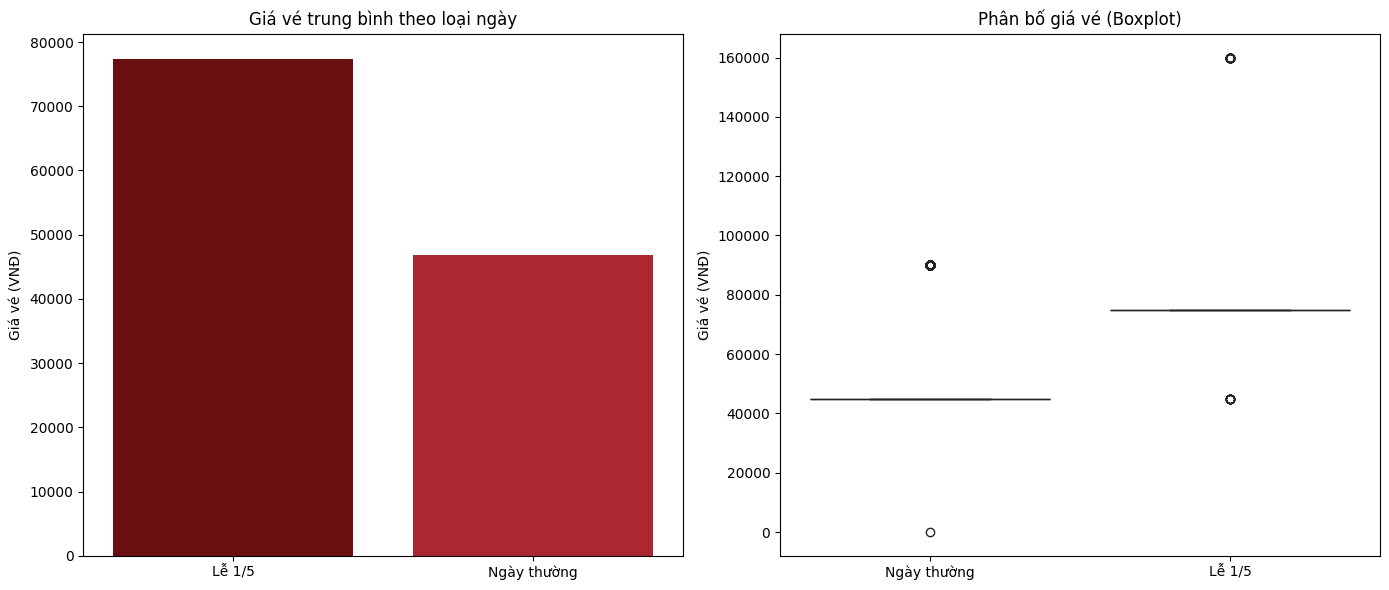

In [8]:

df_final.groupby("orderid").size().value_counts()
#Giá vé trung bình giữa ngày lễ và ngày thường
# Phân loại ngày lễ và ngày thường
df_final["Loại ngày"] = df_final["saledate"].apply(
    lambda x: "Lễ 1/5" if x == pd.Timestamp("2019-05-01") else "Ngày thường"
)

# Tính giá vé trung bình 
avg_price = df_final.groupby("Loại ngày")["ticket price"].mean().reset_index()


palette_custom = ["#780000", "#C1121F"]

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Barplot giá vé trung bình
sns.barplot(data=avg_price, x="Loại ngày", y="ticket price", palette=palette_custom, ax=axes[0])
axes[0].set_title("Giá vé trung bình theo loại ngày")
axes[0].set_xlabel("")
axes[0].set_ylabel("Giá vé (VNĐ)")

# Boxplot phân bố giá vé
sns.boxplot(data=df_final, x="Loại ngày", y="ticket price", palette=palette_custom, ax=axes[1])
axes[1].set_title("Phân bố giá vé (Boxplot)")
axes[1].set_xlabel("")
axes[1].set_ylabel("Giá vé (VNĐ)")

plt.tight_layout()
plt.show()
may_data = df_final[df_final["saledate"].dt.month == 5]


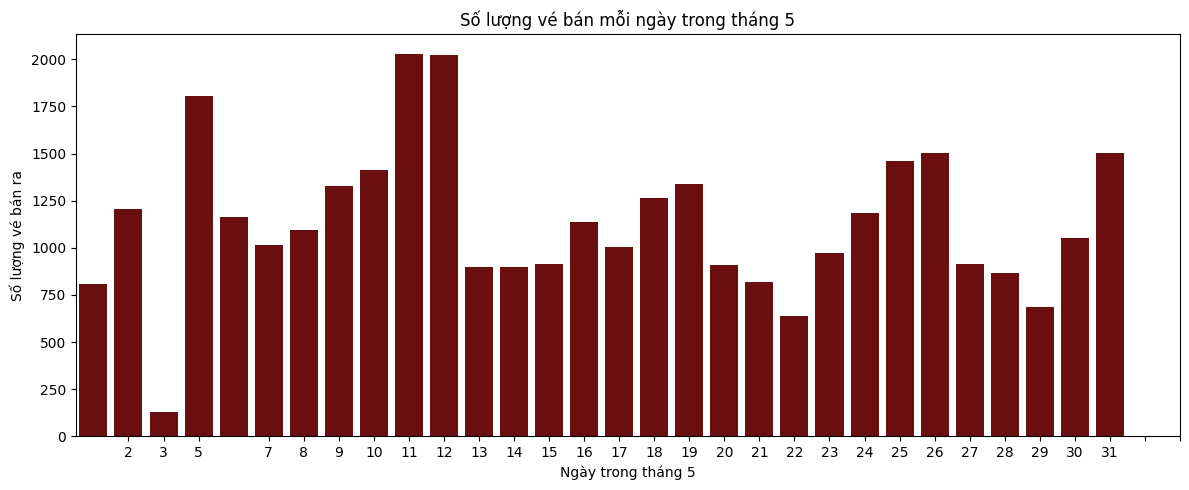

In [9]:

# Số lượng vé bán theo từng ngày
daily_ticket_count = may_data["saledate"].value_counts().sort_index()

# Màu custom palette — lấy màu đầu tiên trong palette đã quy định
custom_color = "#780000"

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))
sns.barplot(x=daily_ticket_count.index.day, y=daily_ticket_count.values, color=custom_color)
plt.title("Số lượng vé bán mỗi ngày trong tháng 5")
plt.xlabel("Ngày trong tháng 5")
plt.ylabel("Số lượng vé bán ra")
plt.xticks(daily_ticket_count.index.day)  # Chỉ hiện ngày có vé bán
plt.tight_layout()
plt.show()


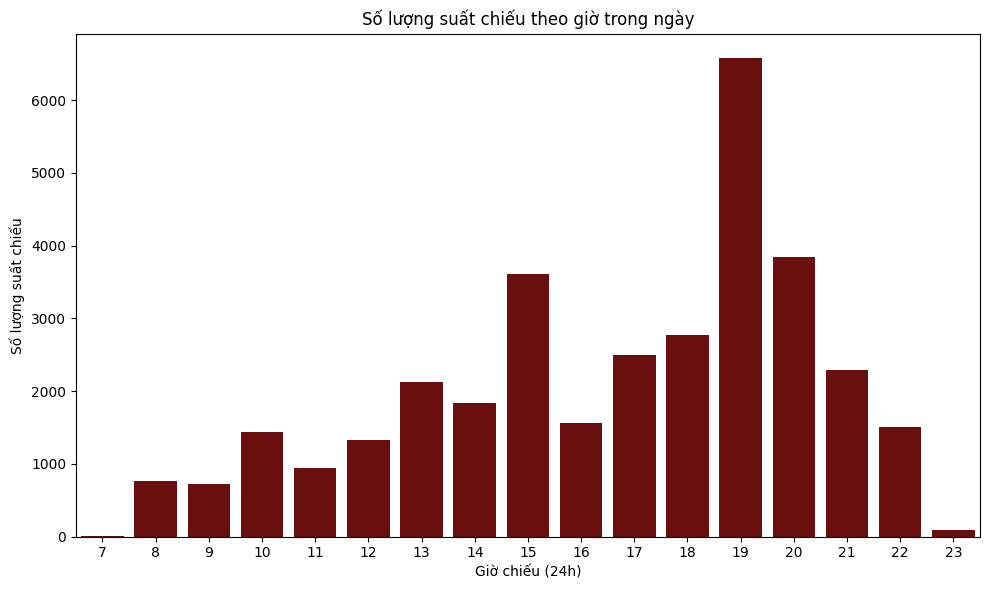

In [10]:

# 
df_final["time"] = pd.to_datetime(df_final["time"])

# 
df_final["Giờ chiếu"] = df_final["time"].dt.hour

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(
    x=df_final["Giờ chiếu"].dropna().value_counts().sort_index().index,
    y=df_final["Giờ chiếu"].dropna().value_counts().sort_index().values,
    color="#780000"
)
plt.title("Số lượng suất chiếu theo giờ trong ngày")
plt.xlabel("Giờ chiếu (24h)")
plt.ylabel("Số lượng suất chiếu")
plt.tight_layout()
plt.show()




C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\3100642731.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_revenue, x="Weekday", y="ticket price", palette=custom_palette)


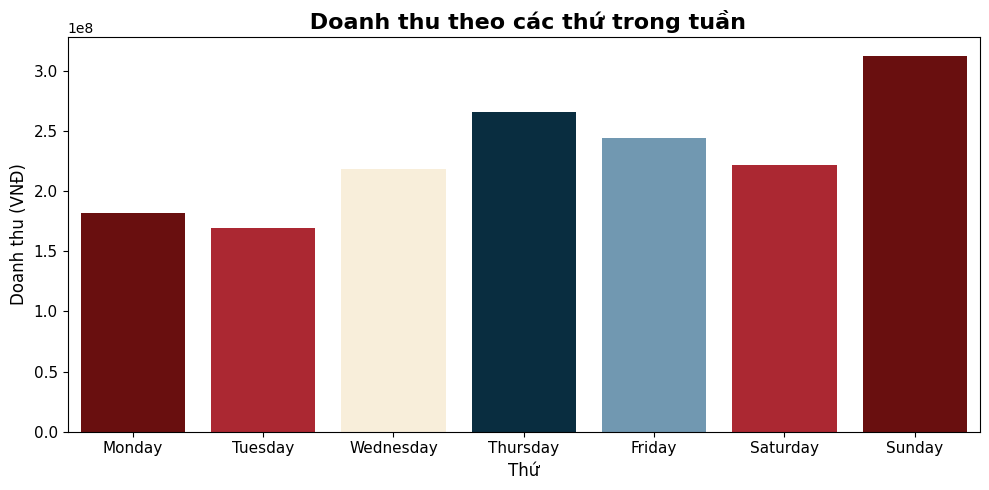

In [11]:


# Chuyển cột saledate về datetime 
df_final["saledate"] = pd.to_datetime(df_final["saledate"])

# Tạo cột ngay
df_final["Weekday"] = df_final["saledate"].dt.day_name()

# Tính tổng doanh thu theo  ngay trong tuan
weekday_revenue = df_final.groupby("Weekday")["ticket price"].sum().reset_index()

# Sắp xếp đúng thứ tự các ngày trong tuần
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_revenue["Weekday"] = pd.Categorical(weekday_revenue["Weekday"], categories=weekday_order, ordered=True)
weekday_revenue = weekday_revenue.sort_values("Weekday")

# Vẽ biểu đồ doanh thu theo thứ
custom_palette = ["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC", "#C1121F", "#780000"]

# Vẽ biểu đồ doanh thu theo thứ
plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_revenue, x="Weekday", y="ticket price", palette=custom_palette)
plt.title(" Doanh thu theo các thứ trong tuần", fontsize=16, fontweight='bold')
plt.ylabel("Doanh thu (VNĐ)", fontsize=12)
plt.xlabel("Thứ", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\2646495379.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts, x="Country", y="Count", palette="dark:#C1121F")  # Dark red palette


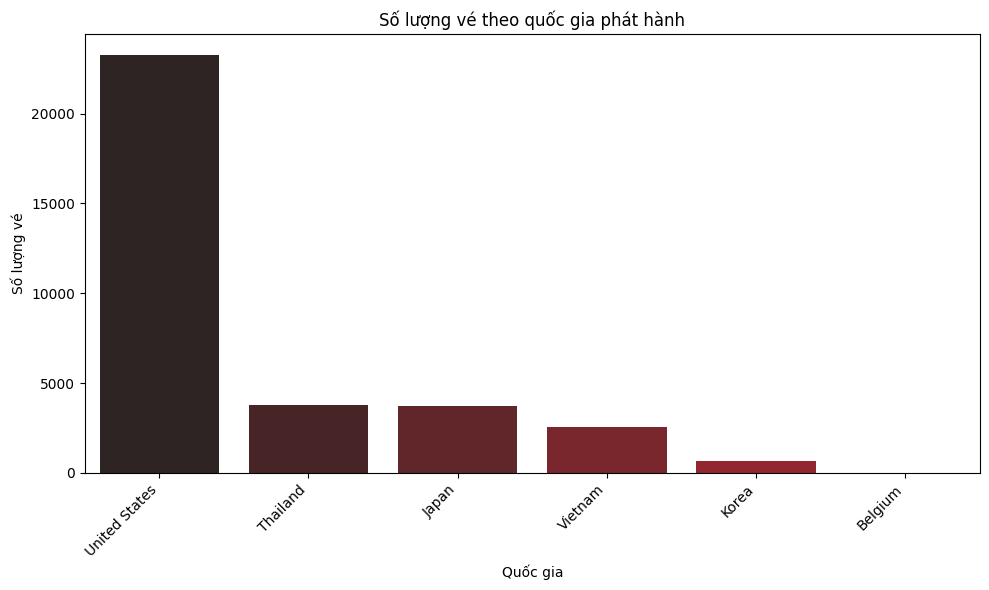

GenreList  Action  Action-Adventure  Adventure  Animation  Comedy  Crime  \
Giờ chiếu                                                                  
7               0                 8          0          0       0      0   
8             218               163        114         61     238      3   
9             202               307        190         40     115      0   
10            313               539        174         21     530     66   
11            182               157         82          0     142     74   
12            229               371        168         56     559    112   
13            371               495        232         88     865    125   
14            482               545        402          9     445     20   
15            609              1061        222        107     756     16   
16            169               537        169         41     566      0   
17            549               543        470        338     923     29   
18          

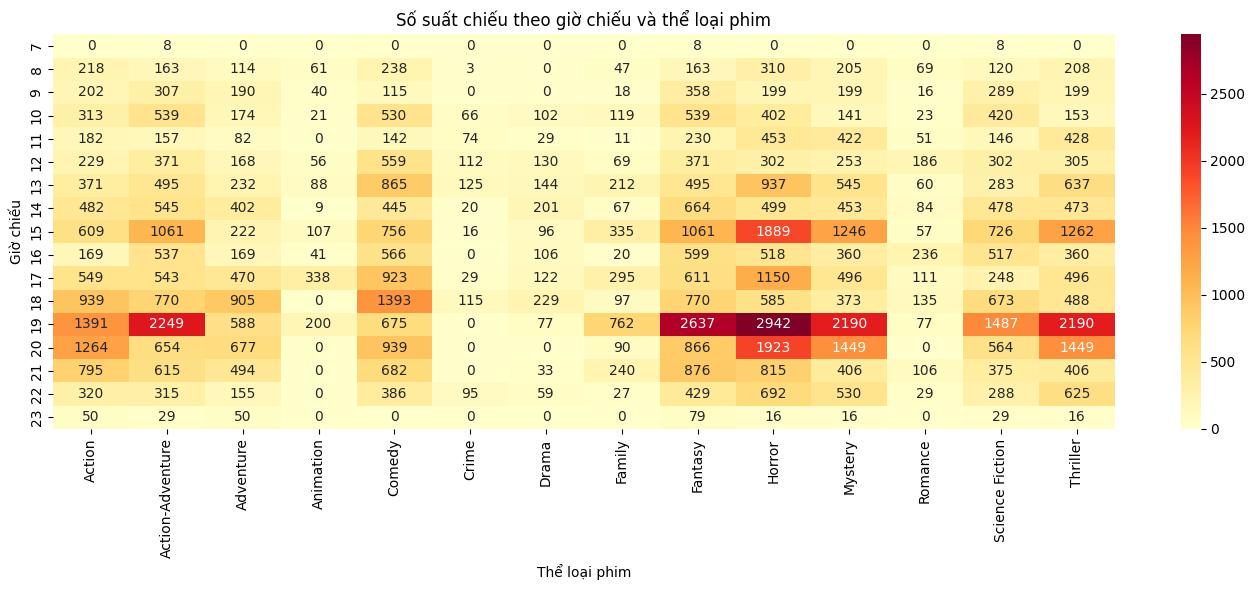

C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\2646495379.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


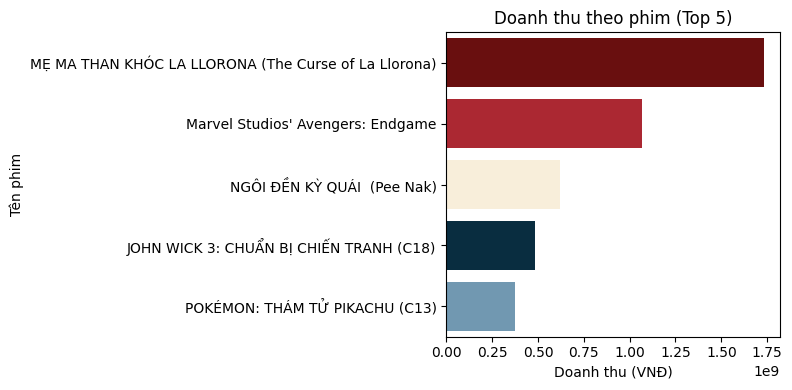

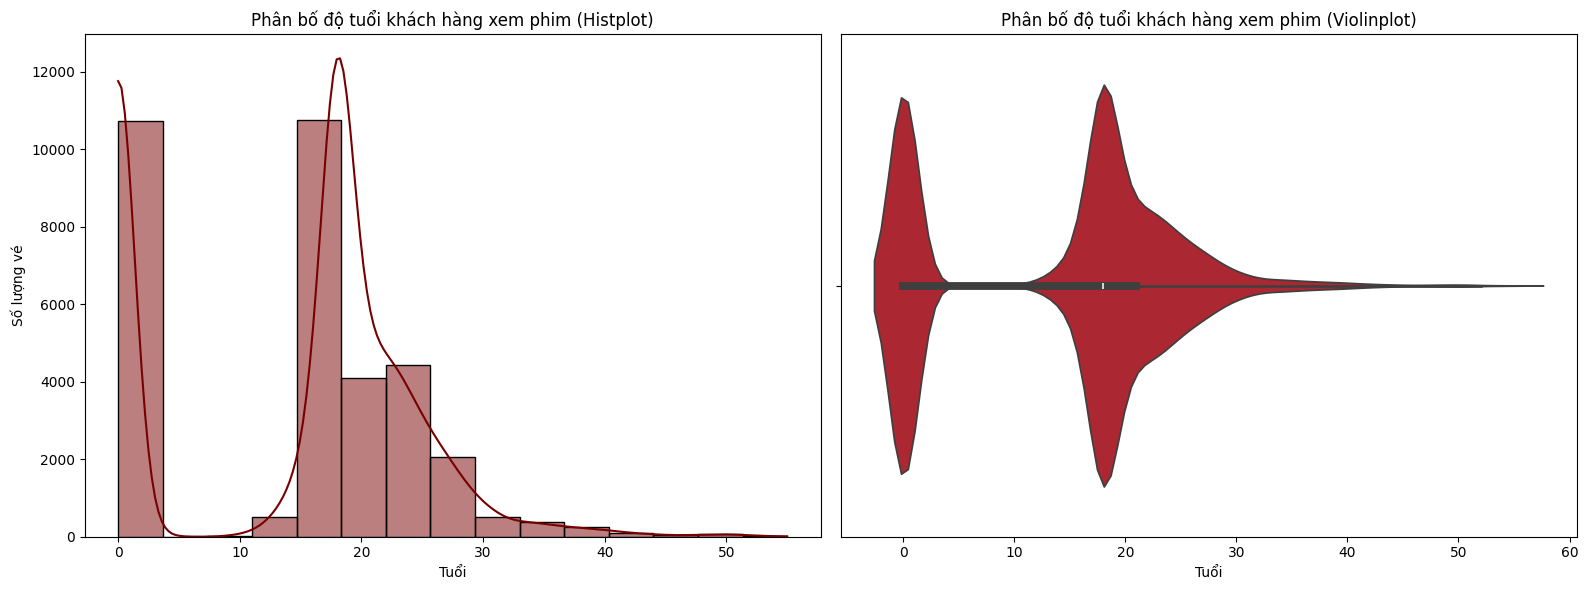

C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\2646495379.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hang_counts.index, y=hang_counts.values, palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"], ax=axes[0])
C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\2646495379.py:98: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=hang_counts.index, y=hang_counts.values, palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"], ax=axes[0])
C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\2646495379.py:114: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A01' has dtype incompatible with int64, please explicitly cast 

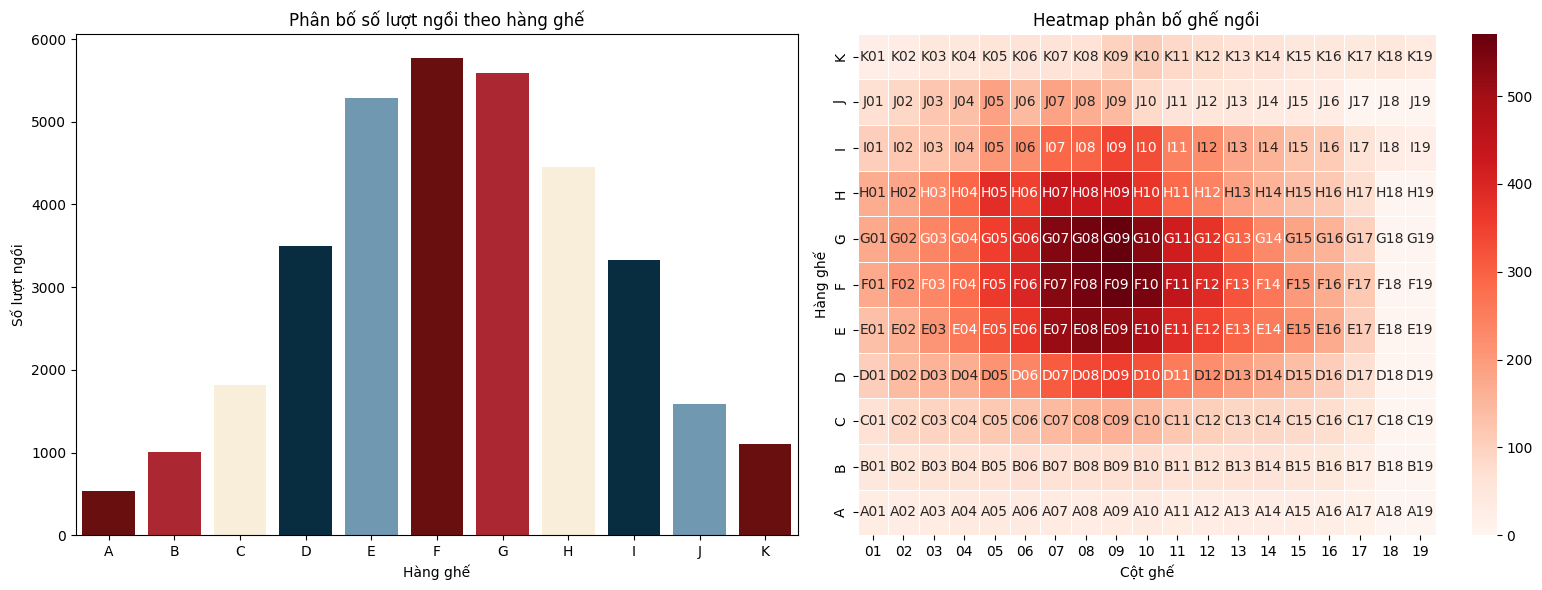

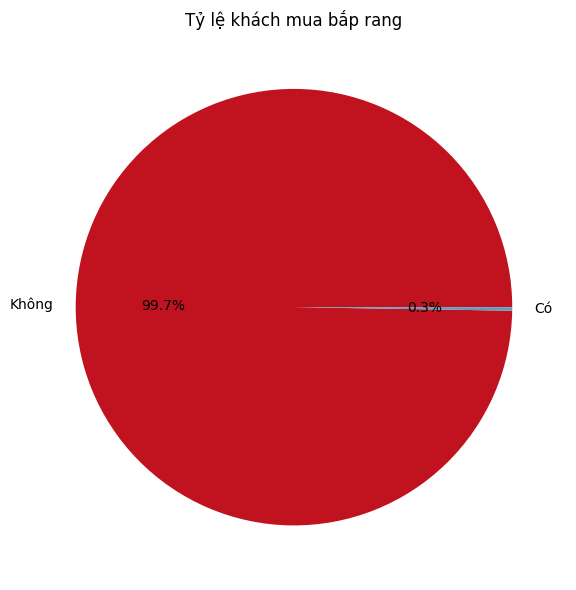

C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\2646495379.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\2646495379.py:179: UserWarning: 
The palette list has fewer values (5) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


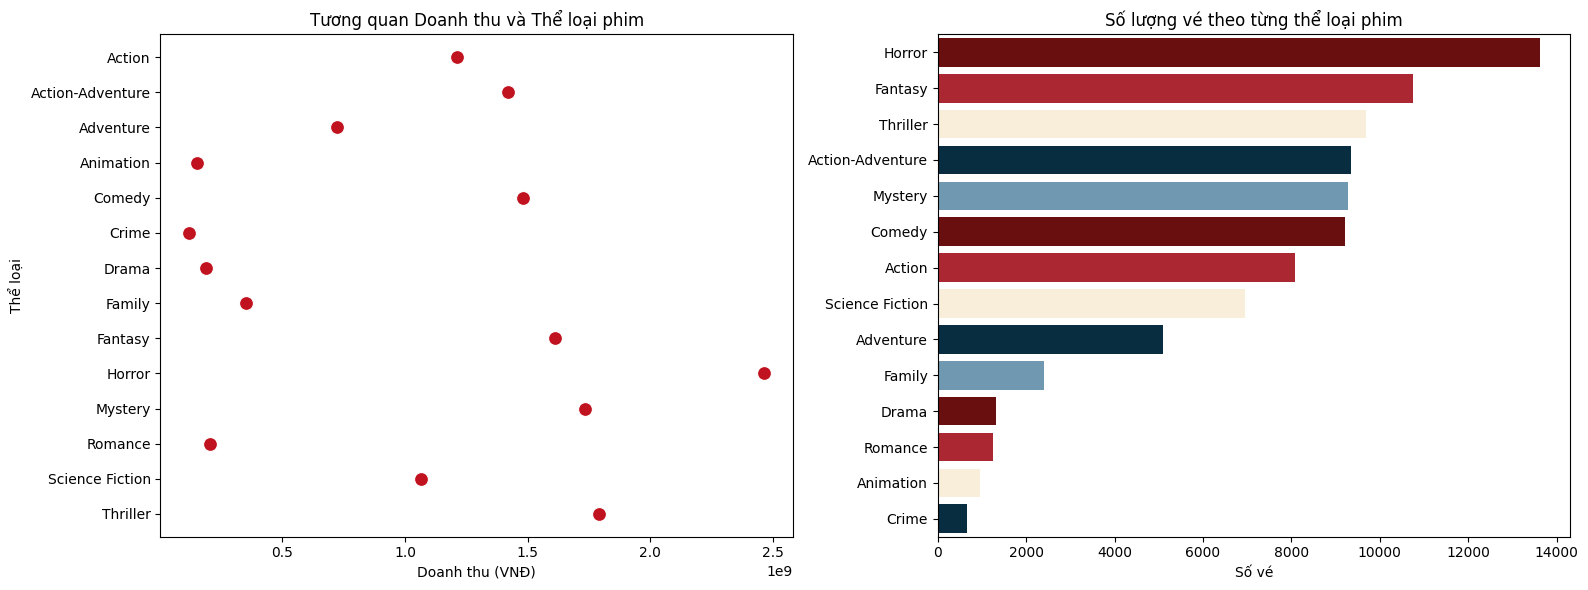

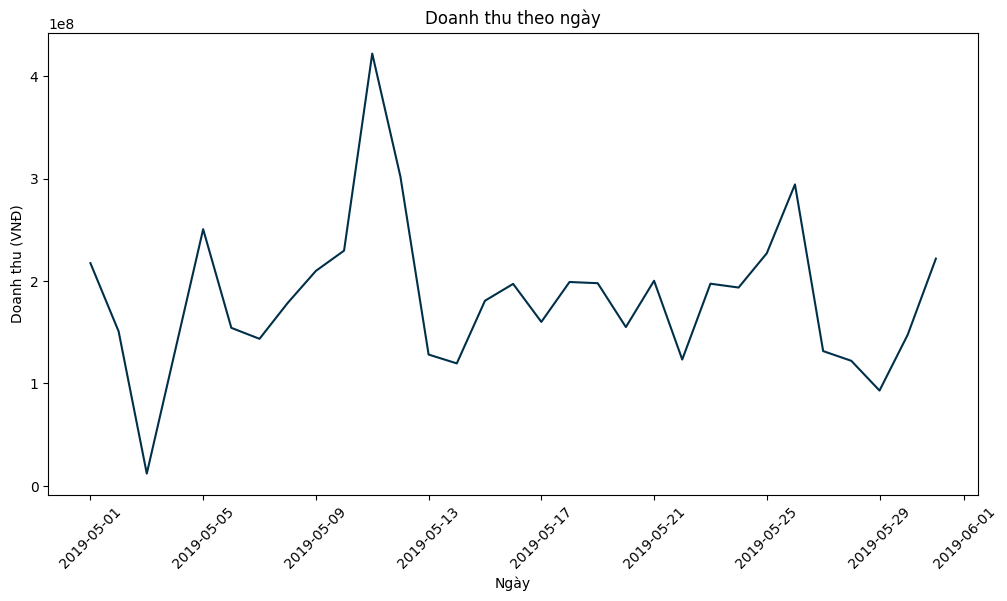

In [12]:

# Số lượng vé theo quốc gia phát hành
country_counts = df_final["country"].value_counts().reset_index()
country_counts.columns = ["Country", "Count"]

# Biểu đồ 
plt.figure(figsize=(10, 6))
sns.barplot(data=country_counts, x="Country", y="Count", palette="dark:#C1121F")  # Dark red palette
plt.title("Số lượng vé theo quốc gia phát hành")
plt.xlabel("Quốc gia")
plt.ylabel("Số lượng vé")
plt.xticks(rotation=45, ha='right')  # Để quốc gia không bị chồng chéo
plt.tight_layout()
plt.show()



GenreList  Action  Action-Adventure  Adventure  Animation  Comedy  Crime  \
Giờ chiếu                                                                  
7               0                 8          0          0       0      0   
8             218               163        114         61     238      3   
9             202               307        190         40     115      0   
10            313               539        174         21     530     66   
11            182               157         82          0     142     74   
12            229               371        168         56     559    112   
13            371               495        232         88     865    125   
14            482               545        402          9     445     20   
15            609              1061        222        107     756     16   
16            169               537        169         41     566      0   
17            549               543        470        338     923     29   
18          

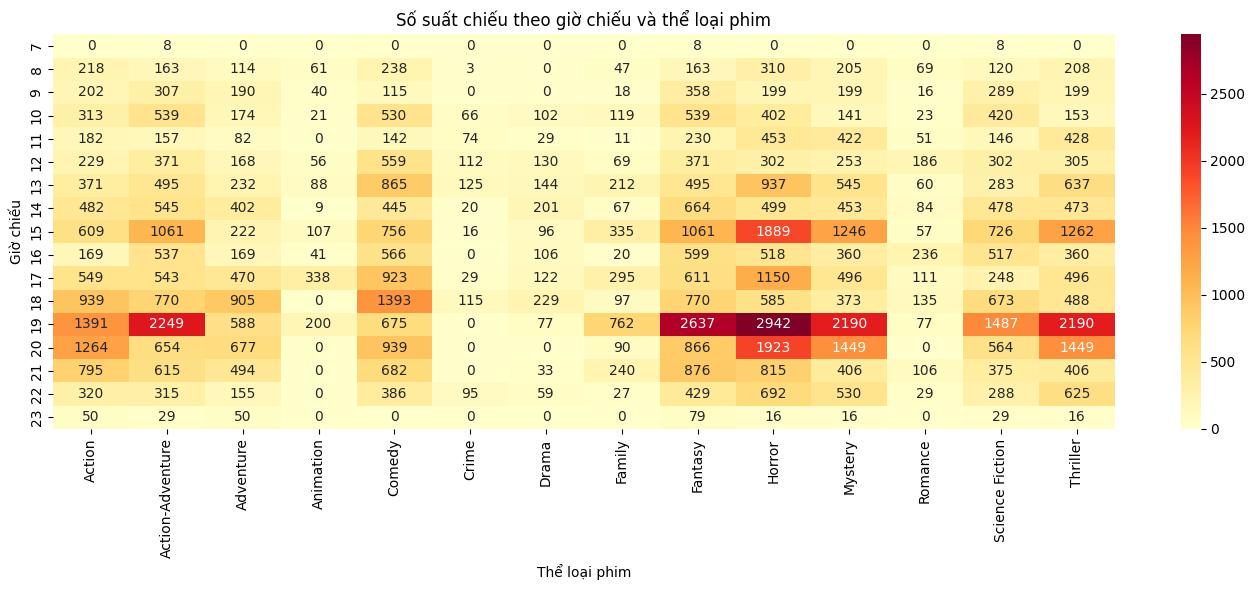

In [13]:

# Số suất chiếu
# Explode
df_explode = df_final.copy()
df_explode["GenreList"] = df_explode["listed_in"].str.split(",")
df_explode = df_explode.explode("GenreList")
df_explode["GenreList"] = df_explode["GenreList"].str.strip()

# Tính số lượng suất chiếu theo giờ chiếu và thể loại phim
heatmap_genre_time = df_explode.groupby(["Giờ chiếu", "GenreList"]).size().unstack(fill_value=0)

# 
print(heatmap_genre_time)

# Vẽ heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_genre_time, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Số suất chiếu theo giờ chiếu và thể loại phim")
plt.xlabel("Thể loại phim")
plt.ylabel("Giờ chiếu")
plt.tight_layout()
plt.show()


C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\3631260764.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


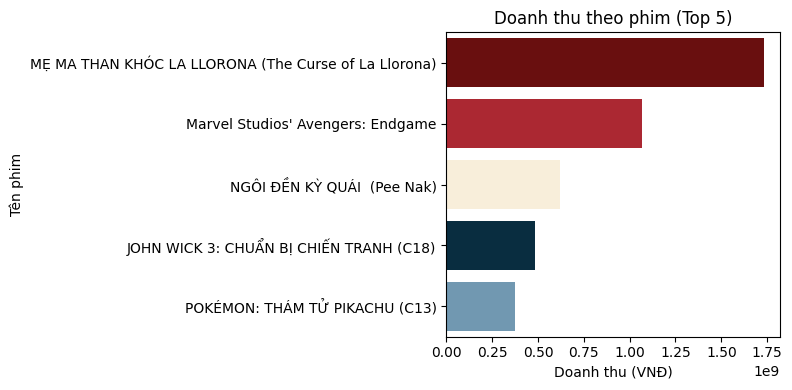

In [14]:

# Tính số lượng vé trong mỗi hóa đơn
df_final["Số vé trong hóa đơn"] = df_final.groupby("orderid")["orderid"].transform("count")

# Giá vé cho mỗi vé bán
df_final["Giá vé"] = df_final["total"] / df_final["Số vé trong hóa đơn"]

# Doanh thu cho mỗi phim
df_final["Doanh thu"] = df_final["Giá vé"] * df_final["Số vé trong hóa đơn"]

# Tổng doanh thu theo từng phim
movie_revenue = df_final.groupby("title")["Doanh thu"].sum().reset_index()

# 5 phim có doanh thu cao nhất
movie_revenue = movie_revenue.sort_values(by="Doanh thu", ascending=False).head(5)

# Vẽ barplot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=movie_revenue, 
    x="Doanh thu", 
    y="title", 
    palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"]  # palette chuẩn màu bạn list
)
plt.title("Doanh thu theo phim (Top 5)")
plt.xlabel("Doanh thu (VNĐ)")
plt.ylabel("Tên phim")
plt.tight_layout()
plt.show()


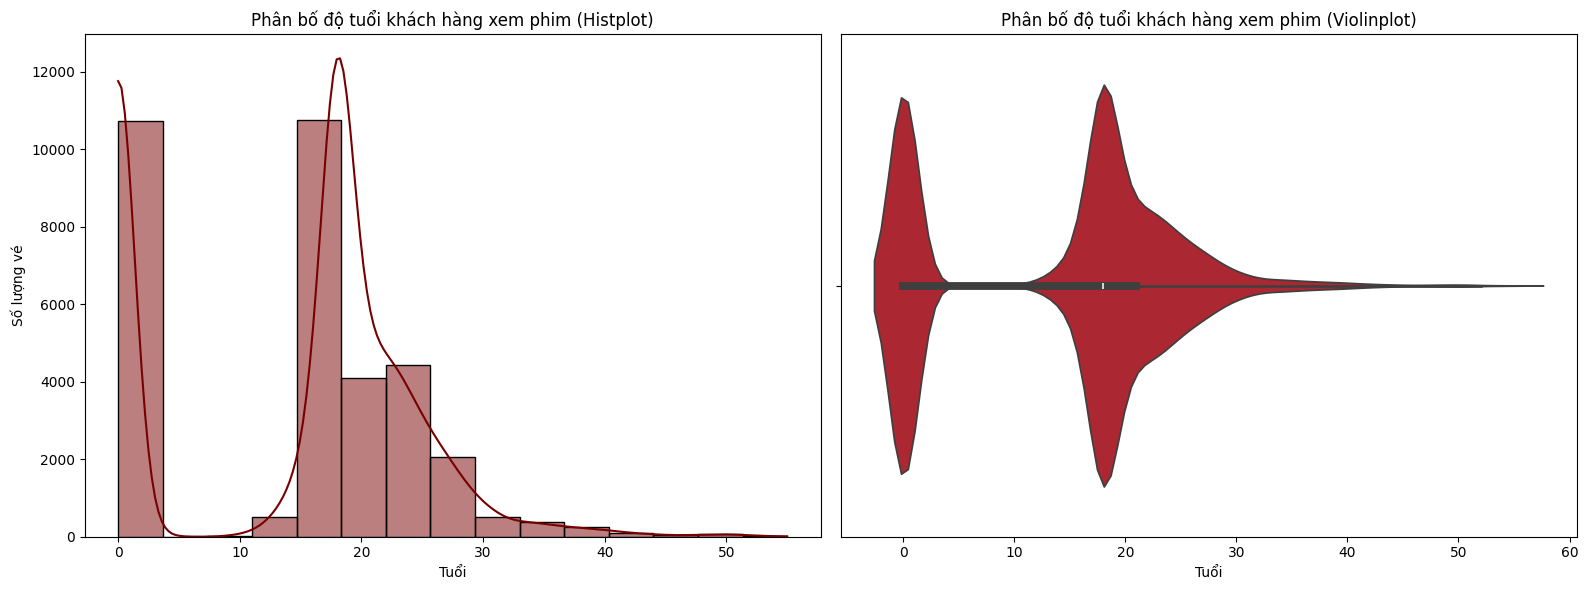

In [15]:


# Phân bố độ tuổi
df_final["Age"] = pd.to_numeric(df_final["Age"], errors="coerce")  # Chuyển độ tuổi sang kiểu số, xử lý lỗi

# Vẽ histplot và boxplot trong cùng một cửa sổ sử dụng subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Vẽ histplot
sns.histplot(df_final["Age"].dropna(), bins=15, kde=True, color="#780000", ax=axes[0])
axes[0].set_title("Phân bố độ tuổi khách hàng xem phim (Histplot)")
axes[0].set_xlabel("Tuổi")
axes[0].set_ylabel("Số lượng vé")

# Vẽ violinplot
sns.violinplot(x=df_final["Age"], color="#C1121F", ax=axes[1])
axes[1].set_title("Phân bố độ tuổi khách hàng xem phim (Violinplot)")
axes[1].set_xlabel("Tuổi")

plt.tight_layout()
plt.show()


C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\2646726729.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hang_counts.index, y=hang_counts.values, palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"], ax=axes[0])
C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\2646726729.py:12: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=hang_counts.index, y=hang_counts.values, palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"], ax=axes[0])
C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\2646726729.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A01' has dtype incompatible with int64, please explicitly cast t

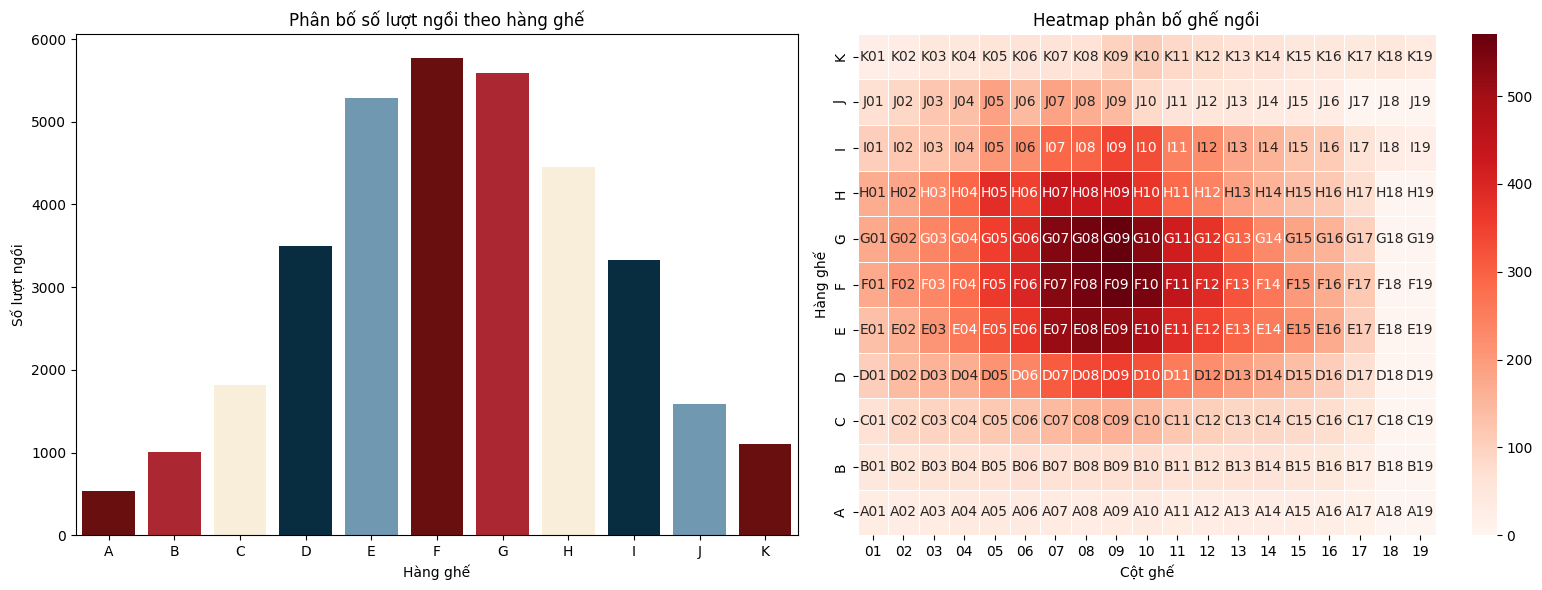

In [17]:

# Phân bố ghế ngồi
df_final["Hàng ghế"] = df_final["slot"].str[0]
df_final["Số ghế"] = df_final["slot"].str[1:]

# Đếm số lượt theo hàng ghế
hang_counts = df_final["Hàng ghế"].value_counts().sort_index()

# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Vẽ barplot phân bố số lượt ngồi theo hàng ghế
sns.barplot(x=hang_counts.index, y=hang_counts.values, palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"], ax=axes[0])
axes[0].set_title("Phân bố số lượt ngồi theo hàng ghế")
axes[0].set_xlabel("Hàng ghế")
axes[0].set_ylabel("Số lượt ngồi")

# Sự phân bố ghế ngồi
df_final["Hàng ghế"] = df_final["slot"].str.extract(r"([A-Z])")
df_final["Cột ghế"] = df_final["slot"].str.extract(r"(\d+)")

# Đếm số lượt ngồi theo vị trí
heatmap_data = df_final.groupby(["Hàng ghế", "Cột ghế"]).size().unstack(fill_value=0)

# Tạo bảng ghi nhãn là tên ghế (A01, B05, ...)
labels = heatmap_data.copy()
for row in labels.index:
    for col in labels.columns:
        labels.loc[row, col] = f"{row}{col}"

# Vẽ heatmap phân bố ghế ngồi
sns.heatmap(
    heatmap_data.sort_index(ascending=False),
    cmap="Reds",  # Đổi màu palette của heatmap sang sắc đỏ
    linewidths=0.5,
    annot=labels.sort_index(ascending=False),
    fmt="s", 
    ax=axes[1]
)
axes[1].set_title("Heatmap phân bố ghế ngồi")
axes[1].set_xlabel("Cột ghế")
axes[1].set_ylabel("Hàng ghế")


plt.tight_layout()
plt.show()



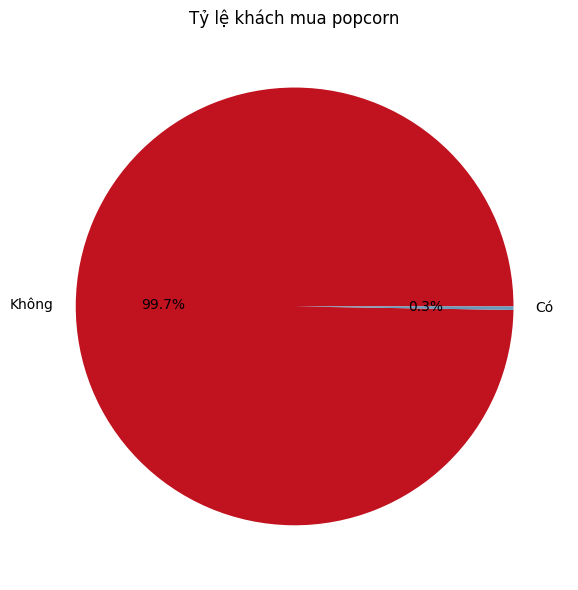

In [19]:


# Tỷ lệ khách mua popcorn
popcorn_counts = df_final["popcorn"].value_counts()

colors = ["#C1121F", "#669BBC"]
plt.figure(figsize=(6, 6))
plt.pie(popcorn_counts, labels=popcorn_counts.index, autopct="%.1f%%", colors=colors)
plt.title("Tỷ lệ khách mua popcorn")
plt.tight_layout()
plt.show()


C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\502332018.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\DO PHUONG DUNG\AppData\Local\Temp\ipykernel_9980\502332018.py:35: UserWarning: 
The palette list has fewer values (5) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


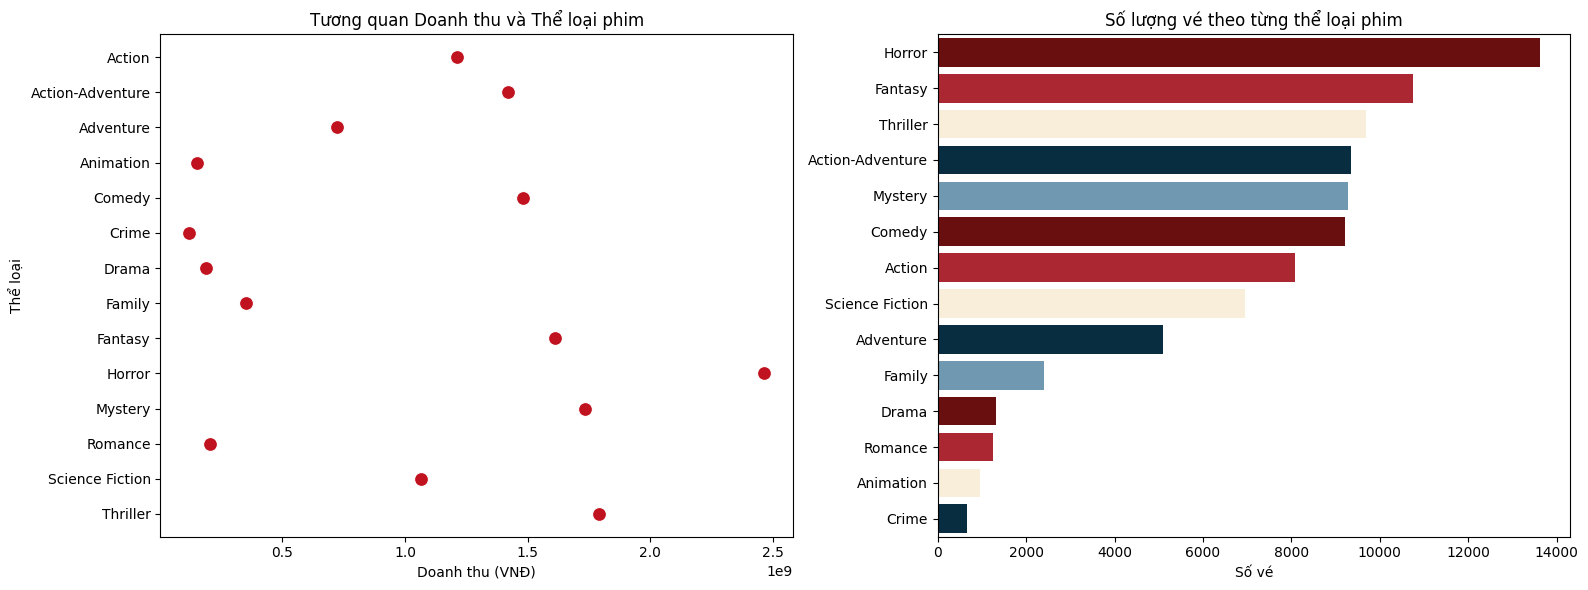

In [20]:

# Tách thể loại phim
df_genre = df_final.copy()
df_genre["GenreList"] = df_genre["listed_in"].str.split(",")
df_genre = df_genre.explode("GenreList")
df_genre["GenreList"] = df_genre["GenreList"].str.strip()

#Doanh thu
if 'doanh_thu' not in df_genre.columns:
    df_genre["doanh_thu"] = df_genre["Số vé trong hóa đơn"] * df_genre["Giá vé"]

# Doanh thu theo thể loại phim
genre_revenue = df_genre.groupby("GenreList")["doanh_thu"].sum().reset_index()

# Số lượng vé theo thể loại phim
genre_counts = df_genre["GenreList"].value_counts().reset_index()
genre_counts.columns = ["GenreList", "Số vé"]

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatterplot doanh thu theo thể loại
sns.scatterplot(
    data=genre_revenue, 
    x="doanh_thu", 
    y="GenreList", 
    color="#C1121F", 
    s=100, 
    ax=axes[0]
)
axes[0].set_title("Tương quan Doanh thu và Thể loại phim")
axes[0].set_xlabel("Doanh thu (VNĐ)")
axes[0].set_ylabel("Thể loại")

# Barplot số lượng vé theo thể loại
sns.barplot(
    data=genre_counts, 
    y="GenreList", 
    x="Số vé", 
    palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"], 
    ax=axes[1]
)
axes[1].set_title("Số lượng vé theo từng thể loại phim")
axes[1].set_xlabel("Số vé")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()
